## Binary Classification Problem

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# create dataset
n_samples=1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (1000, 2)
Shape of y: (1000,)


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "labels": y})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


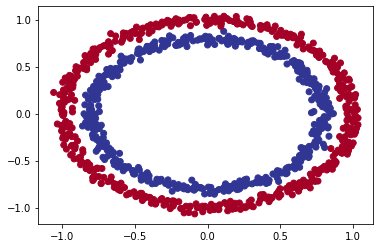

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)

shape of X_train: (750, 2)
shape of X_test: (250, 2)


In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# train the model
history = model_5.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
loss, accuracy = model_5.evaluate(X_test, y_test)
print('Evaluation: loss:{:.2f}, accuracy:{:.2f}'.format(loss, accuracy))


# Make predictions
y_preds = model_5.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9960
Evaluation: loss:0.05, accuracy:1.00


### Plot decision boundary


In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
  '''
  Plot the decision boundary created by a model predicting on X
  '''
  # Define the axis boundaries of the plot 
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  # create a meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X value (to make predictions on these values)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predicts
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multi-class classification')
    # reshape the predictions.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else: # binary classification
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


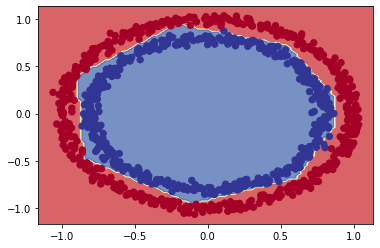

In [ ]:
plot_decision_boundary(model_5, X, y)

### Plot Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_pretty_confusion_matrix(y_test, y_preds, classes=None, figsize=(10,10), text_size=20):
  """
  Plots a beatiful confusion matrix 
  """
  # create confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis=1)
  n_classes = cm.shape[0]

  # plot
  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix", 
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  # set X-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i,j] > threshold else "black",
        size=text_size
        )

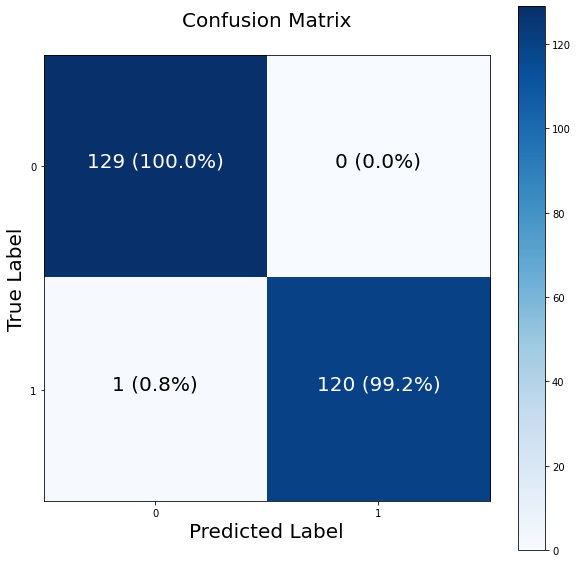

In [ ]:
plot_pretty_confusion_matrix(y_test, y_preds, figsize=(10,10))

## Multi-class classification problem

- Fashion MNIST dataset
- Input: 28x28 images
- Output: class labels (0 to 9)
- 60,000 training samples and 10,000 test samples

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# download the dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot ']

4431872/4422102 [==============================] - 0s 0us/step


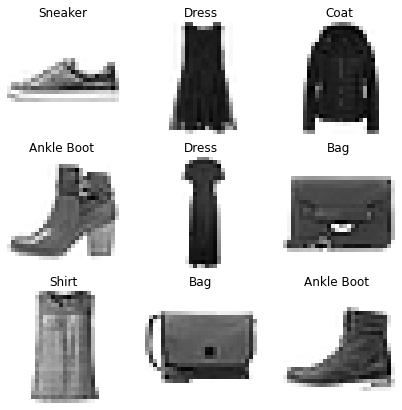

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_labels[train_labels[rand_index]])
  plt.axis(False)

Normalize the dataset
- Neural networks work better with normalized datasets
- If the labels are non-binary numbers or integers, use `SparseCategoricalCrossentropy` loss function
- Otherwise, use one-hot encoding for output labels along with `BinaryCrossentropy` loss function
- Output layer will use `softmax` activation for a multi-class problem.
- Use a flatten layer in the input to convert matrix into a vector.

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
# Build a multi-class classification model
import tensorflow as tf
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')                                  
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

history_11 = model_11.fit(train_data, train_labels, 
          validation_data=(test_data, test_labels), epochs=10, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

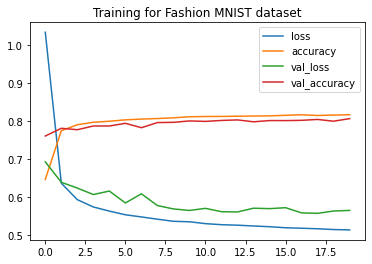

In [ ]:
import pandas as pd
df = pd.DataFrame(history_11.history)
df.plot(title='Training for Fashion MNIST dataset')

In [ ]:
df.head(5)

,loss,accuracy,val_loss,val_accuracy
0,1.034784,0.647433,0.693734,0.7617
1,0.637599,0.775667,0.640015,0.7820
2,0.594212,0.791383,0.624713,0.7783
3,0.574958,0.797917,0.607760,0.7881
4,0.564112,0.800600,0.616884,0.7881


In [ ]:
# make some predictions 
y_probs = model_11.predict(test_data) # probabilities

# Convert prediction probabilities to integers
y_preds = y_probs.argmax(axis=1)

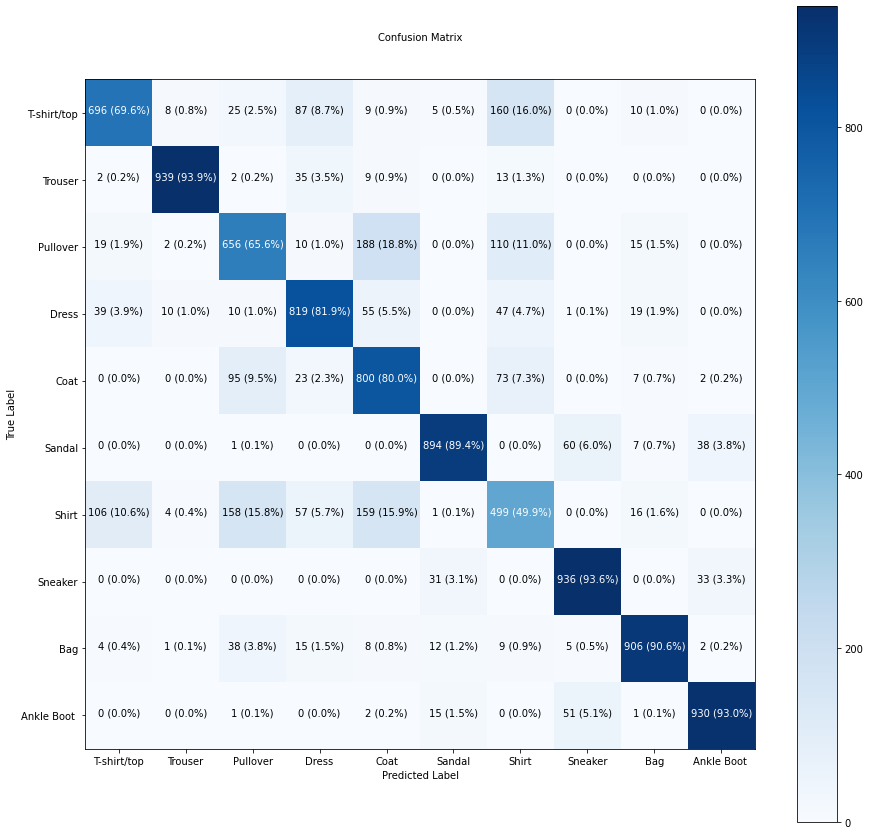

In [ ]:
plot_pretty_confusion_matrix(y_test=test_labels, y_preds=y_preds, classes=class_labels, figsize=(15,15), text_size=10)

### Plot random images with predictions

In [ ]:
import random 
def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with prediction & true labels
  """
  i = random.randint(0, len(images))

  # target image
  target_image = images[i]


  # Prediction
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100 * tf.reduce_max(pred_probs),
                                                  true_label), color=color)

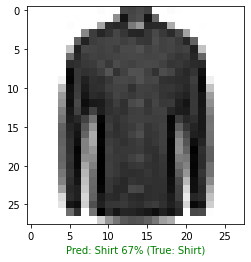

In [ ]:
plot_random_image(model=model_11, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_labels)

In [ ]:
import random 
import matplotlib.pyplot as plt 

def plot_random_images(model, images, true_labels, classes, rows=1, cols=1, scale=2):
  """
  picks a random image, plots it and labels it with prediction & true labels
  """
  assert rows >=1 and cols >=1, "rows and cols must be non-zero positive integers"
  # total number of images to be plotted
  n = rows * cols
  fig = plt.figure(figsize=(rows*scale, cols*scale), tight_layout=True)
  for i in range(n):
    ax = plt.subplot(rows, cols, i+1)
    index = random.randint(0, len(images))

    # target image
    target_image = images[index]

    # Prediction
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[index]]

    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Text colors
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    plt.title("Pred: {} {:2.0f}% \n (True: {})".format(pred_label,
                                                    100 * tf.reduce_max(pred_probs),
                                                    true_label), color=color)
    plt.axis('off')
 

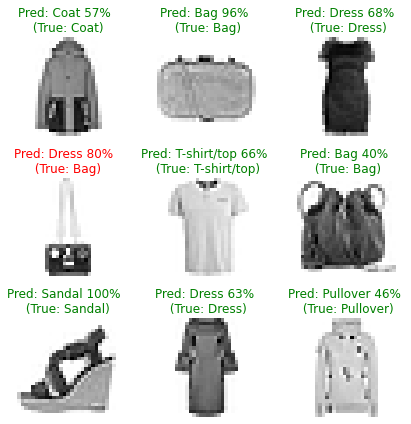

In [ ]:
plot_random_images(model=model_11, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_labels, rows=3, cols=3, scale=2)

## CNN Binary Classification



### Download the dataset

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-06 21:10:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 74.125.124.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   145MB/s    in 0.7s    

2022-05-06 21:10:46 (145 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os
# walk through the pizza_steak folder and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# another way to get image count in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
print(num_steak_images_train)

750


### visualize the dataset

In [ ]:
import pathlib 
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  '''
  View a random image from a folder.
  '''
  target_folder = target_dir + target_class 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read the image 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}") # show the shape of the image
  return img


['1351631.jpg']
Image shape: (512, 512, 3)


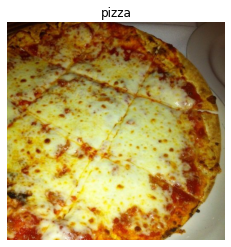

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

### Create and train a CNN model

In [ ]:

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# set the random seed
tf.random.set_seed(42)

# preprocess data & with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)


# set up directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories
train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224), 
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu',
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# train
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 44s 702ms/step - loss: 0.6548 - accuracy: 0.6180 - val_loss: 0.5491 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 27s 574ms/step - loss: 0.5404 - accuracy: 0.7387 - val_loss: 0.4010 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 27s 571ms/step - loss: 0.5018 - accuracy: 0.7693 - val_loss: 0.3602 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 27s 574ms/step - loss: 0.4983 - accuracy: 0.7633 - val_loss: 0.3502 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 28s 591ms/step - loss: 0.4876 - accuracy: 0.7867 - val_loss: 0.4570 - val_accuracy: 0.7940


### Plot training curves

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
  """
  plots separate loss and accuracy curves
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training')
  plt.plot(epochs, val_loss, label='validation')
  plt.title('Losses')
  plt.legend(loc='best')
  plt.xlabel('Epochs')
  plt.ylabel('Losses')

  plt.figure()
  plt.plot(epochs, accuracy, label='training')
  plt.plot(epochs, val_accuracy, label='validation')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='best')


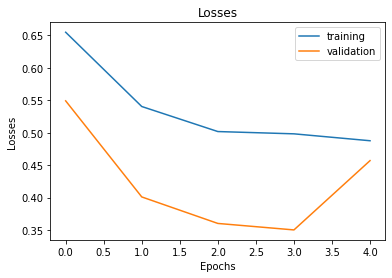

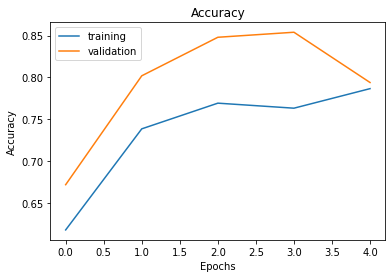

In [ ]:
plot_training_curves(history_1)

### Evaluate on a custom image

In [ ]:
# load the custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-05-06 21:17:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-05-06 21:17:46 (31.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



shape of steak: (4032, 3024, 3)


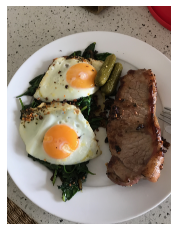

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)
print('shape of steak:',steak.shape)

### Function to load and preprocess a custom image

In [ ]:
import tensorflow as tf
def load_and_prep_image(filename, img_shape=224):
  """
  loads and preprocess image - resize & normalize
  """
  # read the file
  img = tf.io.read_file(filename)

  # decode the file into an image
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size=(img_shape, img_shape))

  # scale the image
  img = img / 255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
pred = model_1.predict(tf.expand_dims(steak,axis=0))
print('Prediction Probability:', pred) 

Prediction Probability: [[0.7244245]]


### Function to load an image and predict its class label

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  loads an image and predicts its class label using the model
  """
  # import the image
  img = load_and_prep_image(filename)

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # plot the image & shows it predicted class label
  plt.imshow(img)
  plt.title(f"Predicted class: {pred_class}")
  plt.axis(False)
  return pred 

Prediction Probability:  [[0.7244245]]


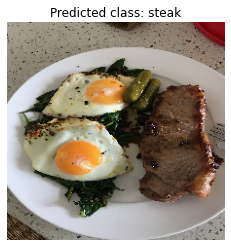

In [ ]:
prob = pred_and_plot(model_1, "03-steak.jpeg", class_names=class_names)
print('Prediction Probability: ', prob)

In [ ]:
# try another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2022-05-06 21:34:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-05-06 21:34:13 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



Prediction probability: [[0.3721368]]


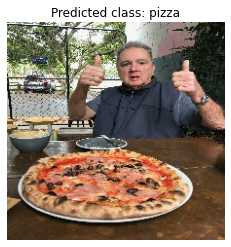

In [ ]:
prob = pred_and_plot(model_1, "03-pizza-dad.jpeg", class_names=class_names)
print('Prediction probability:', prob)

## Multi-class CNN classification

### Load and analyze the dataset

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-03 10:39:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.188.48, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   220MB/s    in 2.2s    

2022-06-03 10:39:54 (220 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'")

There are 2 directories and 0 in '10_food_classes_all_data'
There are 10 directories and 0 in '10_food_classes_all_data/test'
There are 0 directories and 250 in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 in '10_food_classes_all_data/test/pizza'
There are 10 directories and 0 in '10_food_classes_all_data/train'
There are 0 directories and 750 in '10_

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3051220.jpg']
Image shape: (512, 512, 3)


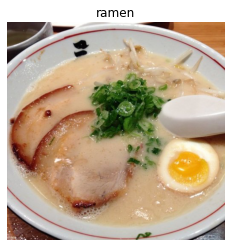

In [ ]:
# visualize images
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Prepare your data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a CNN model

In [ ]:
import tensorflow as tf

# create a model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# train the model
history = model.fit(train_data, 
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 203ms/step - loss: 2.1544 - accuracy: 0.2055 - val_loss: 1.9897 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9395 - accuracy: 0.3153 - val_loss: 1.9143 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7673 - accuracy: 0.3919 - val_loss: 1.8580 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 1.4674 - accuracy: 0.5188 - val_loss: 1.9648 - val_accuracy: 0.3368
Epoch 5/5
235/235 [==============================] - 58s 246ms/step - loss: 0.9313 - accuracy: 0.7072 - val_loss: 2.2598 - val_accuracy: 0.3132


### Evaluate the model


In [ ]:
# evaluate on test data
model.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.2598 - accuracy: 0.3132


[2.259793519973755, 0.3131999969482422]

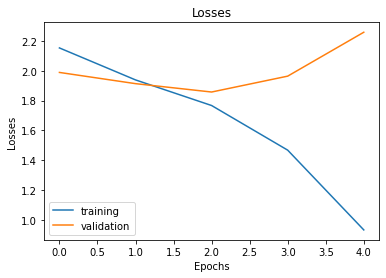

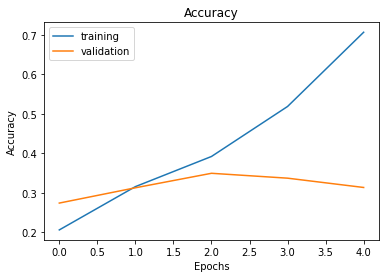

In [ ]:
# plot loss curves
plot_training_curves(history)

### Avoid overfitting with data augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

train_data_augmented = train_datagen_aug.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             batch_size=32,
                                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_1 = tf.keras.models.clone_model(model)
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_augmented, epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 129s 546ms/step - loss: 2.1880 - accuracy: 0.1891 - val_loss: 2.0368 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 138s 587ms/step - loss: 2.0942 - accuracy: 0.2441 - val_loss: 2.0629 - val_accuracy: 0.2568
Epoch 3/5
235/235 [==============================] - 128s 544ms/step - loss: 2.0442 - accuracy: 0.2755 - val_loss: 1.8923 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 1.9857 - accuracy: 0.3023 - val_loss: 1.8067 - val_accuracy: 0.3692
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9515 - accuracy: 0.3212 - val_loss: 1.8230 - val_accuracy: 0.3596


### Evaluate the model

79/79 [==============================] - 11s 133ms/step - loss: 1.8230 - accuracy: 0.3596


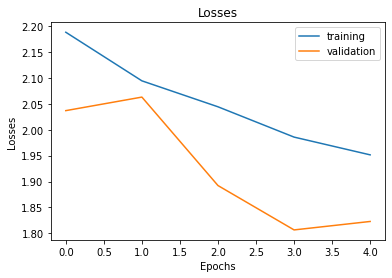

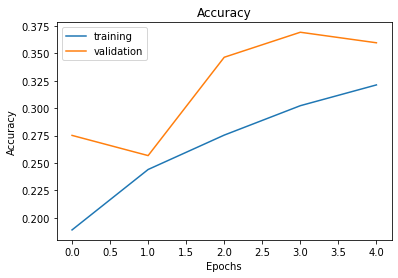

In [ ]:
# evaluate test data
model_1.evaluate(test_data)

# plot training curves
plot_training_curves(history_1)

### Make predictions on custom images

In [ ]:
# download some custom images

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-06-03 11:01:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-06-03 11:01:07 (231 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-06-03 11:01:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

array([[0.0563913 , 0.02401947, 0.07537582, 0.11879458, 0.09390298,
        0.1300272 , 0.07193185, 0.12728257, 0.1679442 , 0.13433008]],
      dtype=float32)

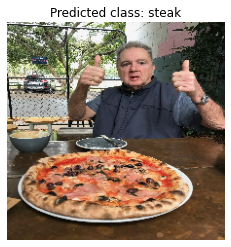

In [ ]:
pred_and_plot(model=model_1, filename='03-pizza-dad.jpeg',
          class_names=class_names)

## Transfer Learning - Part 1 - Feature Extraction

### Load dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-06-04 14:45:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   163MB/s    in 1.0s    

2022-06-04 14:45:08 (163 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
def walk_through_folder(folder_path):
    """
    Walks through a given folder 
    Args:
        folder_path: 
    """
    for dirpath, dirnames, filenames in os.walk(folder_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_folder('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent

### Create Image Data Generators

In [ ]:

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [ ]:
# create data generators

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                           target_size=IMG_SIZE,
                                                           batch_size=BATCH_SIZE,
                                                           class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                                        target_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')


### set up tensorboard callbacks

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    """
    create tensorboard log folders
    """
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving Tensorboard log files to: {log_dir}")
    return tensorboard_callback 

Saving Tensorboard log files to: tensorflow_hub/resnet50v2/20220603-115754


### Download pre-trained model from tensorflow Hub

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(model_url, num_classes=10):
  """
  Takes a tensorflow hub URL and returns a keras sequential model
  Args:
    model_url (str): A tensorflow hub feature extraction url
    num_classes: number of output neurons = number of target classes

  returns:
    an uncompiled keras sequential model
  """
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            input_shape=IMG_SHAPE+(3,))
  
  # create sequential model
  model = tf.keras.Sequential([
                               feature_extraction_layer,
                               layers.Dense(num_classes, activation='softmax',
                                            name="output_layer")
                              ])
  return model

#### ResNet as Feature Extractor

In [ ]:
# create resnet model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(
                                      dir_name="tensorflow_hub",
                                      experiment_name="resnet50v2"
                                  )])

Saving Tensorboard log files to: tensorflow_hub/resnet50v2/20220603-133845
Epoch 1/5
24/24 [==============================] - 29s 1s/step - loss: 2.1159 - accuracy: 0.3107 - val_loss: 1.2944 - val_accuracy: 0.5892
Epoch 2/5
24/24 [==============================] - 17s 726ms/step - loss: 0.9642 - accuracy: 0.7200 - val_loss: 0.8695 - val_accuracy: 0.7160
Epoch 3/5
24/24 [==============================] - 18s 752ms/step - loss: 0.6430 - accuracy: 0.8347 - val_loss: 0.7566 - val_accuracy: 0.7556
Epoch 4/5
24/24 [==============================] - 15s 662ms/step - loss: 0.4936 - accuracy: 0.8827 - val_loss: 0.7122 - val_accuracy: 0.7620
Epoch 5/5
24/24 [==============================] - 15s 665ms/step - loss: 0.3944 - accuracy: 0.9173 - val_loss: 0.6800 - val_accuracy: 0.7720


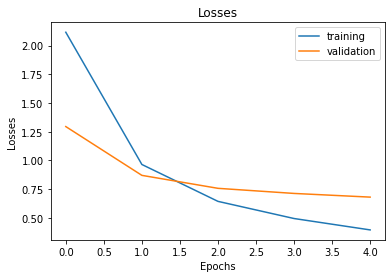

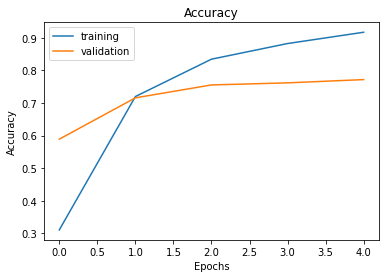

In [ ]:
# plot loss curves
plot_training_curves(resnet_history)

#### EfficientNet as Feature Extractor

In [ ]:
# create efficient net
efficientnet_model = create_model(model_url=efficientnet_url, 
                                  num_classes=train_data_10_percent.num_classes)
efficientnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
efficientnet_model.compile(loss='categorical_crossentropy',
                            optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(
                                                  dir_name="tensorflow_hub",
                                                  experiment_name="efficientnetb0"
                                              )])


Saving Tensorboard log files to: tensorflow_hub/efficientnetb0/20220603-134121
Epoch 1/5
24/24 [==============================] - 24s 679ms/step - loss: 1.8518 - accuracy: 0.4320 - val_loss: 1.2790 - val_accuracy: 0.7464
Epoch 2/5
24/24 [==============================] - 15s 639ms/step - loss: 1.0449 - accuracy: 0.7853 - val_loss: 0.8525 - val_accuracy: 0.8232
Epoch 3/5
24/24 [==============================] - 16s 674ms/step - loss: 0.7436 - accuracy: 0.8467 - val_loss: 0.6860 - val_accuracy: 0.8464
Epoch 4/5
24/24 [==============================] - 15s 644ms/step - loss: 0.6023 - accuracy: 0.8733 - val_loss: 0.6011 - val_accuracy: 0.8572
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.5101 - accuracy: 0.8920 - val_loss: 0.5487 - val_accuracy: 0.8640


In [ ]:
efficientnet_model.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 0.5487 - accuracy: 0.8640


[0.5487244129180908, 0.8640000224113464]

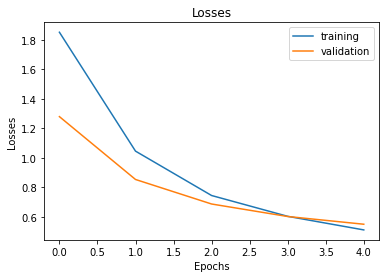

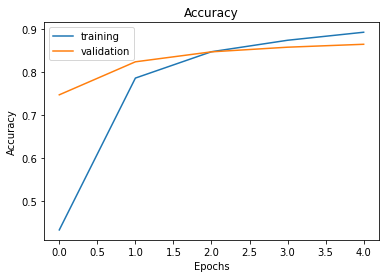

In [ ]:
plot_training_curves(efficientnet_history)

## Transfer Learning - Part 2 - Fine Tuning

In [ ]:
# load helper functions
!wget https://raw.githubusercontent.com/swagatk/tf_deep_learning/master/helper_functions.py

--2022-06-04 14:45:20--  https://raw.githubusercontent.com/swagatk/tf_deep_learning/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8295 (8.1K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   8.10K  --.-KB/s    in 0s      

2022-06-04 14:45:21 (82.6 MB/s) - ‘helper_functions.py’ saved [8295/8295]



In [ ]:
!python helper_functions.py

In [ ]:
from helper_functions import create_tensorboard_callback, plot_training_curves, unzip_data, walk_through_folder

### Use pre-trained models using new interfaces:
- `tf.keras.applications`

#### Create a data generator using a new interface

In [ ]:
import tensorflow as tf 
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

#### Create a model using functional API

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# if using ResNet50V2, you need to rescale the input
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.0)(inputs)

x = base_model(inputs)
print(f"shape of inputs after base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling")(x)
print(f"shape after pooling layer: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation='softmax', name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_0_10_percent = model_0.fit(train_data_10_percent,
                                   epochs=5,
                                   steps_per_epoch=len(train_data_10_percent),
                                   validation_data=test_data,
                                   validation_steps=0.25*len(test_data),
                                   callbacks=[create_tensorboard_callback(
                                       dir_name='transfer_learning',
                                       experiment_name='10_percent_feature_extraction'
                                   )]) 


shape of inputs after base model: (None, 7, 7, 1280)
shape after pooling layer: (None, 1280)
Saving Tensorboard log files to: transfer_learning/10_percent_feature_extraction/20220603-194018
Epoch 1/5
24/24 [==============================] - 94s 4s/step - loss: 1.8898 - accuracy: 0.4213 - val_loss: 1.3157 - val_accuracy: 0.7141
Epoch 2/5
24/24 [==============================] - 134s 6s/step - loss: 1.1381 - accuracy: 0.7453 - val_loss: 0.9243 - val_accuracy: 0.7953
Epoch 3/5
24/24 [==============================] - 122s 5s/step - loss: 0.8403 - accuracy: 0.7960 - val_loss: 0.7575 - val_accuracy: 0.8266
Epoch 4/5
24/24 [==============================] - 149s 6s/step - loss: 0.6855 - accuracy: 0.8387 - val_loss: 0.6617 - val_accuracy: 0.8359
Epoch 5/5
24/24 [==============================] - 99s 4s/step - loss: 0.5875 - accuracy: 0.8627 - val_loss: 0.6126 - val_accuracy: 0.8406


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 100ms/step - loss: 0.6073 - accuracy: 0.8340


[0.6073129177093506, 0.8339999914169312]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


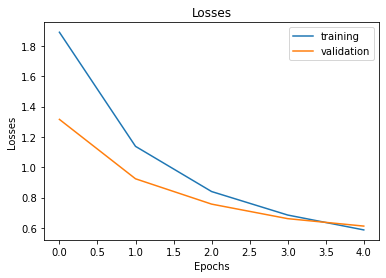

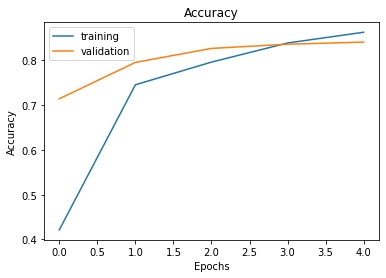

In [ ]:
plot_training_curves(history_0_10_percent)

### Improve performance using Data Augmentation

In [ ]:
# Adding data augmentation as a layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2),
], name="data_augmentation" )
 

#### Visualize data augmentation layer output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Augmented Image from class: hamburger')

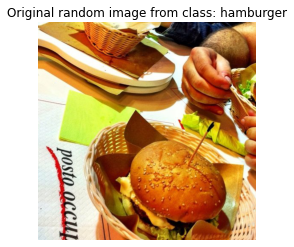

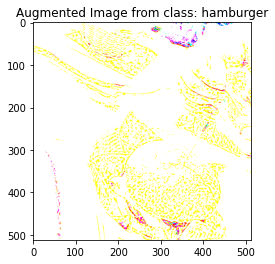

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random
target_class = random.choice(train_data_10_percent.class_names)
target_dir = "10_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
#print(random_image)  
random_image_path = target_dir + "/" + random_image

# original image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False) 

# augmented image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img))
plt.title(f"Augmented Image from class: {target_class}")

#### Create model with data augmentation as a layer

In [ ]:
IMG_SIZE = (224, 224, 3)
BATCH_SIZE = 32

# load base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# create model
inputs = tf.keras.layers.Input(shape=IMG_SIZE, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling")(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

# Compile
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                              

#### Create model checkpoint callback

In [ ]:
checkpoint_path="ten_percent_checkpoint_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
# train
history_1_10_percent = model_1.fit(train_data_10_percent,
                                   epochs=5,
                                   steps_per_epoch=len(train_data_10_percent),
                                   validation_data=test_data,
                                   validation_steps=0.25*len(test_data),
                                   callbacks=[create_tensorboard_callback(
                                       dir_name="transfer_learning",
                                       experiment_name="10_pc_data_aug"),
                                    checkpoint_callback]
                                   )


Saving Tensorboard log files to: transfer_learning/10_pc_data_aug/20220604-144602
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9769 - accuracy: 0.3493
Epoch 1: saving model to ten_percent_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 31s 565ms/step - loss: 1.9769 - accuracy: 0.3493 - val_loss: 1.5013 - val_accuracy: 0.6438
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3381 - accuracy: 0.6627
Epoch 2: saving model to ten_percent_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 401ms/step - loss: 1.3381 - accuracy: 0.6627 - val_loss: 1.0678 - val_accuracy: 0.7547
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0301 - accuracy: 0.7373
Epoch 3: saving model to ten_percent_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 9s 375ms/step - loss: 1.0301 - accuracy: 0.7373 - val_loss: 0.8528 - val_accuracy: 0.8000
Epoch 4/5
24/24 [===========

In [ ]:
org_model_1_result_10_pc = model_1.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.6957 - accuracy: 0.8100


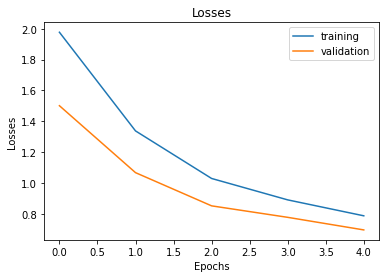

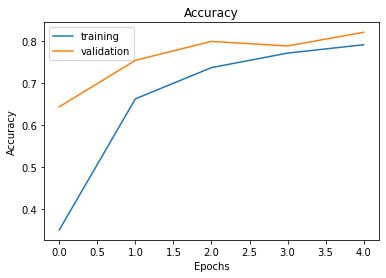

In [ ]:
plot_training_curves(history_1_10_percent)

#### Loading checkpoints weights

In [ ]:
model_1.load_weights(checkpoint_path)
loaded_model_1_result_10_pc = model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6957 - accuracy: 0.8100


In [ ]:
import numpy as np

np.isclose(np.array(org_model_1_result_10_pc), np.array(loaded_model_1_result_10_pc))

array([ True,  True])

### Fine-Tuning 
 - Unfreeze last 10 layers of the base model 
 - retrain the model for additional 5 epochs

In [ ]:
model_1.layers

In [ ]:
for layer in model_1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f42714899d0> True
<keras.engine.sequential.Sequential object at 0x7f42714d1390> True
<keras.engine.functional.Functional object at 0x7f4260470150> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f42714898d0> True
<keras.layers.core.dense.Dense object at 0x7f42604a9590> True


In [ ]:
# Layers in the base model - EfficientNetB0
for i, layer in enumerate(model_1.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
print(len(model_1.layers[2].trainable_variables))

0


In [ ]:
# Set the last 10 layers of our base model to trainable
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

# recompile 
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),    # reduce the learning rate
                metrics=['accuracy'])



In [ ]:
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
print(len(model_1.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
initial_epochs=5
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_1 except with more trainable parameters)
history_fine_10_pc_data_aug = model_1.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          initial_epoch=history_1_10_percent.epoch[-1],
                                          callbacks=[create_tensorboard_callback(
                                              dir_name='transfer_learning',
                                              experiment_name='10_pc_fine_tune_last_10'
                                          )])

Saving Tensorboard log files to: transfer_learning/10_pc_fine_tune_last_10/20220604-145026
Epoch 5/10
24/24 [==============================] - 18s 457ms/step - loss: 0.6680 - accuracy: 0.8093 - val_loss: 0.5886 - val_accuracy: 0.8109
Epoch 6/10
24/24 [==============================] - 10s 427ms/step - loss: 0.5582 - accuracy: 0.8320 - val_loss: 0.5772 - val_accuracy: 0.8109
Epoch 7/10
24/24 [==============================] - 9s 369ms/step - loss: 0.4701 - accuracy: 0.8613 - val_loss: 0.5405 - val_accuracy: 0.8092
Epoch 8/10
24/24 [==============================] - 8s 300ms/step - loss: 0.4390 - accuracy: 0.8573 - val_loss: 0.5633 - val_accuracy: 0.8224
Epoch 9/10
24/24 [==============================] - 9s 338ms/step - loss: 0.3877 - accuracy: 0.8907 - val_loss: 0.5590 - val_accuracy: 0.8076
Epoch 10/10
24/24 [==============================] - 9s 348ms/step - loss: 0.3391 - accuracy: 0.9013 - val_loss: 0.5625 - val_accuracy: 0.8174


In [ ]:
# Evaluate fine-tuned model_1
results_fine_tune_10_percent = model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5020 - accuracy: 0.8360


#### Compare loss curves of fine-tuned model

In [ ]:
import matplotlib.pyplot as plt 

def compare_histories(original_history, new_history, initial_epochs=5):
  """
  Comparing two tensorflow histories
  """
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']
  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # combine original history metrics with new_history metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']
  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # make plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='training_accuracy')
  plt.plot(total_val_acc, label='validation_accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training & Validation Accuracy')

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label='training_accuracy')
  plt.plot(total_val_loss, label='validation_accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.title('Training & Validation Loss')
  

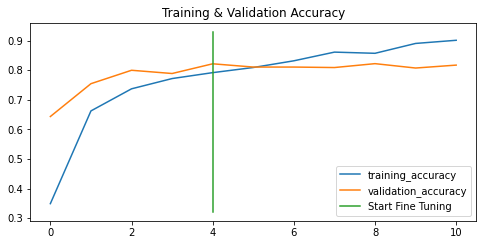

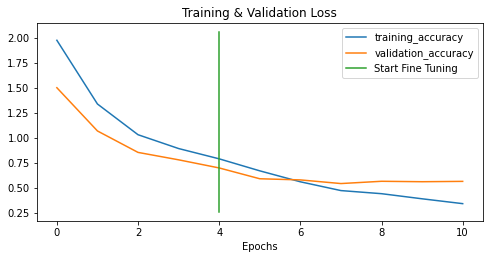

In [ ]:
compare_histories(history_1_10_percent, history_fine_10_pc_data_aug, initial_epochs=5)

#### Trying Fine Tuning on a bigger dataset

In [ ]:
# Download and unzip 10 classes of Food101 data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-04 14:48:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   238MB/s    in 2.1s    

2022-06-04 14:48:37 (238 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data('10_food_classes_all_data.zip')

In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
walk_through_folder("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                     label_mode="categorical",
                                                                                     image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# load the latest weights
model_1.load_weights(checkpoint_path)

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6957 - accuracy: 0.8100


[0.6957468390464783, 0.8100000023841858]

In [ ]:
print(results_fine_tune_10_percent)

[0.5020158886909485, 0.8360000252723694]


In [ ]:
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_avg_pooling True
4 output_layer True


In [ ]:
for layer_number, layer in enumerate(model_1.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])


fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_1.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_1_10_percent.epoch[-1],
                                           callbacks=[create_tensorboard_callback(
                                               dir_name="transfer_learning",
                                               experiment_name="full_10_classes_fine_tune_last_10"
                                           )])

Saving Tensorboard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220604-145356
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


235/235 [==============================] - 60s 229ms/step - loss: 0.7224 - accuracy: 0.7731 - val_loss: 0.4476 - val_accuracy: 0.8569
Epoch 6/10
235/235 [==============================] - 47s 198ms/step - loss: 0.5842 - accuracy: 0.8107 - val_loss: 0.4210 - val_accuracy: 0.8503
Epoch 7/10
235/235 [==============================] - 47s 199ms/step - loss: 0.5212 - accuracy: 0.8291 - val_loss: 0.3917 - val_accuracy: 0.8651
Epoch 8/10
235/235 [==============================] - 39s 164ms/step - loss: 0.4686 - accuracy: 0.8525 - val_loss: 0.3570 - val_accuracy: 0.8849
Epoch 9/10
235/235 [==============================] - 41s 172ms/step - loss: 0.4373 - accuracy: 0.8580 - val_loss: 0.3487 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 41s 173ms/step - loss: 0.4008 - accuracy: 0.8736 - val_loss: 0.3128 - val_accuracy: 0.8947


In [ ]:
result_fine_tune_full_data = model_1.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 0.3097 - accuracy: 0.9008


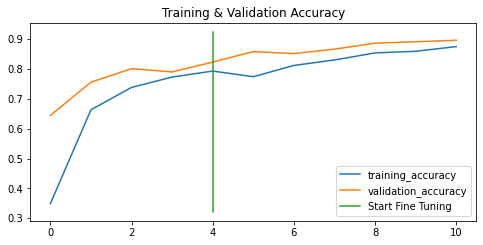

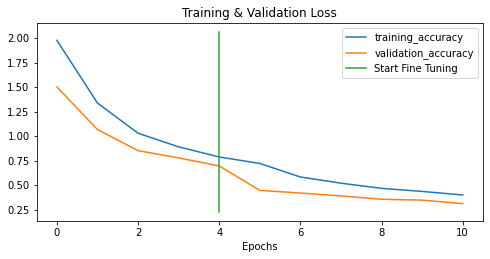

In [ ]:
compare_histories(history_1_10_percent, history_fine_10_classes_full,
                  initial_epochs=5)

#### compare all transfer learning results 
- Visualize using Tensorboard dev

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 classes" \
  --description "A series of transfer learning experiments" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=nZLoQSLEcCe3d3KCOH2TAlVgNHMAic&prompt=consent&access_type=o

In [ ]:
!tensorboard dev listyes

2022-06-04 15:42:25.413816: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope